<a href="https://colab.research.google.com/github/GM-Praveen/Projects/blob/main/Song_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [66]:
tracks = pd.read_csv('/content/tracks_transformed.csv', encoding='latin-1')
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],NaN,1922.0,126.903,6.0,0.645,0.4450,0.0,46.662,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,CapÃ­tulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],NaN,1922.0,98.200,0.0,0.695,0.2630,0.0,37.864,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922.0,181.640,0.0,0.434,0.1770,1.0,38.820,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922.0,176.907,0.0,0.321,0.0946,7.0,32.039,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922.0,163.080,0.0,0.402,0.1580,3.0,43.100,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [67]:
tracks.shape

(33090, 19)

In [68]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33090 entries, 0 to 33089
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33090 non-null  object 
 1   name              33090 non-null  object 
 2   artists           33090 non-null  object 
 3   id_artists        33090 non-null  object 
 4   genres            26017 non-null  object 
 5   release_year      33089 non-null  float64
 6   duration_s        33089 non-null  float64
 7   popularity        33089 non-null  float64
 8   danceability      33089 non-null  float64
 9   energy            33089 non-null  float64
 10  key               33089 non-null  float64
 11  loudness          33089 non-null  float64
 12  mode              33089 non-null  float64
 13  speechiness       33089 non-null  float64
 14  acousticness      33089 non-null  float64
 15  instrumentalness  33089 non-null  float64
 16  liveness          33089 non-null  float6

In [69]:
tracks.isnull().sum()

,0
id,0
name,0
artists,0
id_artists,0
genres,7073
release_year,1
duration_s,1
popularity,1
danceability,1
energy,1


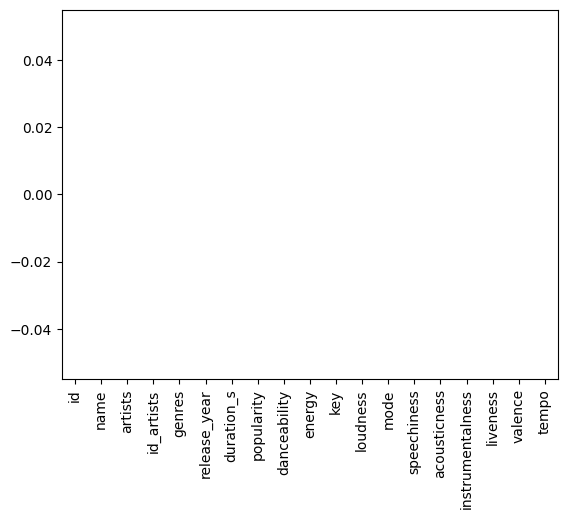

In [70]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [71]:
 tracks = tracks.drop(['id', 'id_artists'], axis = 1)

In [79]:
encoder = LabelEncoder()
tracks['genres'] = encoder.fit_transform(tracks['genres'])

In [82]:
numerical_features = tracks.select_dtypes(include=np.number).columns
tracks_numerical = tracks[numerical_features]

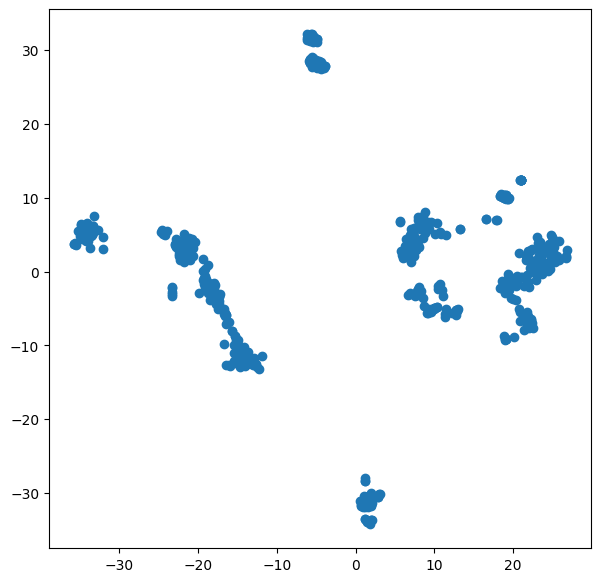

In [87]:
model = TSNE(n_components = 2, random_state = 0)
# Select only numerical features for TSNE
tsne_data = model.fit_transform(tracks_numerical.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

In [88]:
tracks['name'].nunique(), tracks.shape

(22446, (26016, 17))

In [89]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

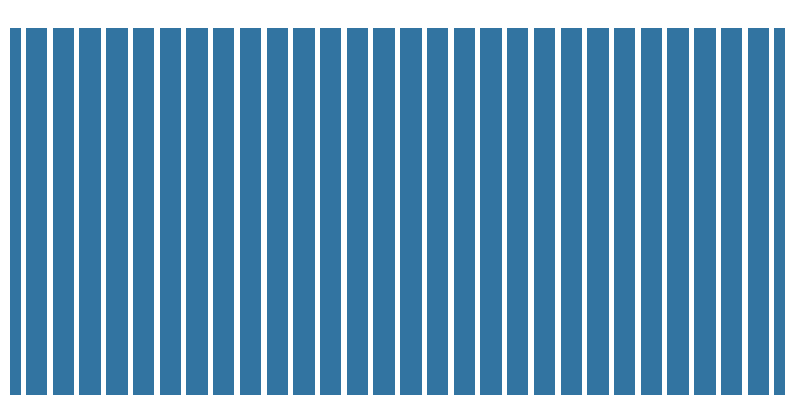

In [91]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['release_year'])
plt.axis('off')
plt.show()

In [94]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

len(floats)

14

ValueError: num must be an integer with 1 <= num <= 10, not 11

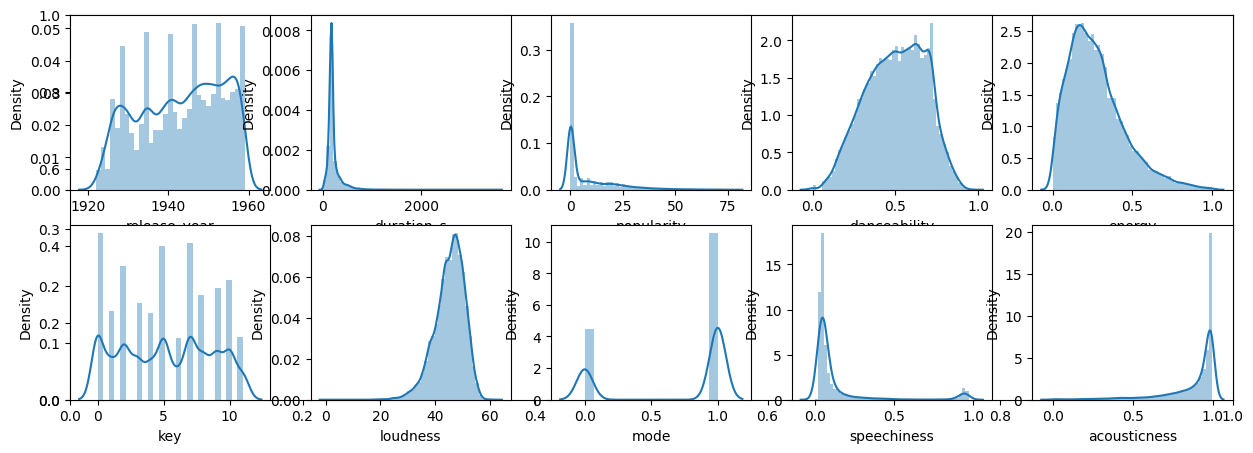

In [96]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [100]:
 tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [102]:
def get_similarities(song_name, data):
    """
    Calculates similarities between a given song and other songs in the dataset.
    """
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
    num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['name']

        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
        num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim

In [104]:
def recommend_songs(song_name, data=tracks):
    # Base case
    if tracks[tracks['name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you\
        have entered invalid_name.\n Some songs you may like:\n')

        for song in data.sample(n=5)['name'].values:
            print(song)
            return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'popularity'],
                    ascending = [False, False],
                    inplace=True)

    # First song will be the input song itself as the similarity will be highest.
    display(data[['name', 'artists']][2:7])

In [112]:
 recommend_songs('Carve')

This song is either not so popular or you        have entered invalid_name.
 Some songs you may like:

June In January


In [114]:
 recommend_songs('Capítulo 1.23 - Banquero Anarquista')

This song is either not so popular or you        have entered invalid_name.
 Some songs you may like:

Half the Fun (aka Lately)


In [110]:
 recommend_songs('Love me like you do')

This song is either not so popular or you        have entered invalid_name.
 Some songs you may like:

Blues Everywhere


In [111]:
 recommend_songs('How High the Moon')

This song is either not so popular or you        have entered invalid_name.
 Some songs you may like:

We're Off To See The Wizard - Trio
